## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [83]:
import pandas as pd

In [84]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 193MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 123MB/s]


Посмотрим на таблицу `Ratings`.

In [85]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [86]:
ratings = ratings[ratings["Book-Rating"] != 0]

In [87]:
isbn_counts = ratings.groupby('ISBN')['User-ID'].count()
user_counts = ratings.groupby('User-ID')['ISBN'].count()

valid_isbns = isbn_counts[isbn_counts > 1].index
valid_users = user_counts[user_counts > 1].index

ratings = ratings[ratings['ISBN'].isin(valid_isbns)]
ratings = ratings[ratings['User-ID'].isin(valid_users)]

In [88]:
print(isbn_counts)

ISBN
 0330299891       1
 0375404120       1
 9022906116       1
#6612432          1
'9607092910'      1
                 ..
\8888809228\""    1
\9170010242\""    1
ooo7156103        1
´3499128624       1
Ô½crosoft         1
Name: User-ID, Length: 185973, dtype: int64


In [89]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270604 entries, 16 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      270604 non-null  int64 
 1   ISBN         270604 non-null  object
 2   Book-Rating  270604 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ MB


In [90]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,270604.0,135784.479723,80964.888219,8.0,66942.0,133852.0,206907.0,278854.0
Book-Rating,270604.0,7.674070,1.811781,1.0,7.0,8.0,9.0,10.0


Как распределяются рейтинги?

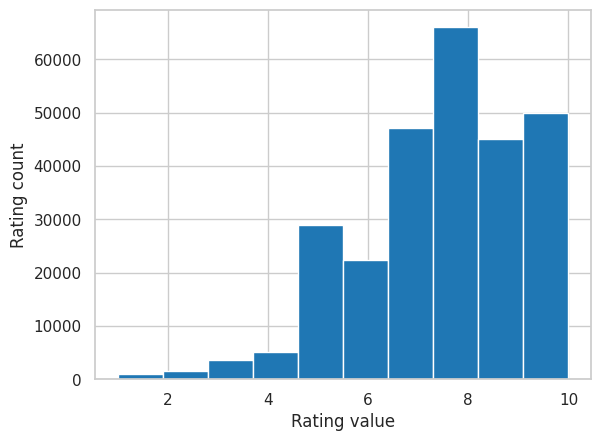

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [92]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-92-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [93]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [94]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

In [95]:
books = books.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [96]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

In [97]:
books.loc[books["ISBN"] == '078946697X', 'Publisher'] = books.loc[books["ISBN"] == '078946697X', 'Year-Of-Publication'].values
books.loc[books["ISBN"] == '078946697X', 'Year-Of-Publication'] = books.loc[books["ISBN"] == '078946697X', 'Book-Author'].values

books.loc[books["ISBN"] == '2070426769', 'Publisher'] = books.loc[books["ISBN"] == '2070426769', 'Year-Of-Publication'].values
books.loc[books["ISBN"] == '2070426769', 'Year-Of-Publication'] = books.loc[books["ISBN"] == '2070426769', 'Book-Author'].values

books.loc[books["ISBN"] == '0789466953', 'Publisher'] = books.loc[books["ISBN"] == '0789466953', 'Year-Of-Publication'].values
books.loc[books["ISBN"] == '0789466953', 'Year-Of-Publication'] = books.loc[books["ISBN"] == '0789466953', 'Book-Author'].values


In [98]:
isbn_list = ['078946697X', '2070426769', '0789466953']
invalid_rows = books[books["ISBN"].isin(isbn_list)]
invalid_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,2000,DK Publishing Inc


In [99]:
value = books.loc[books["ISBN"] == '078946697X', 'Book-Title'].values[0]
print(value)
value = books.loc[books["ISBN"] == '2070426769', 'Book-Title'].values[0]
print(value)
value = books.loc[books["ISBN"] == '0789466953', 'Book-Title'].values[0]
print(value)


DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"


In [100]:
def fix_row(row):
      parts = row["Book-Title"].split('\\";', 1)
      # print(parts)
      if len(parts) == 2:
          row["Book-Title"], row["Book-Author"] = parts
          row["Book-Author"] = row["Book-Author"].replace('"', '')
      else:
          row["Book-Author"] = "Unknown Author"
      return row

books.loc[books["ISBN"].isin(isbn_list)] = books.loc[books["ISBN"].isin(isbn_list)].apply(fix_row, axis=1)

fixed_rows = books[books["ISBN"].isin(isbn_list)]
fixed_rows


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [101]:
fixed_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [102]:
books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(int)
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2008,1
2024,1
1376,1
1378,1
2012,1
1897,1
1919,1
2026,1


In [103]:
books = books[books["Year-Of-Publication"] < 2025]

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [104]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

In [105]:
books = books[(books["Book-Author"].notna()) & (books["Publisher"].notna())]

**SVD**

In [106]:
pip install scikit-surprise

In [107]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import joblib

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

trainset, testset = train_test_split(data, test_size=0.20)

algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)
accuracy.mae(predictions)
joblib.dump(algo, 'svd.pkl')

MAE:  1.2457


['svd.pkl']

In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

valid_ratings = pd.merge(books, ratings.groupby('ISBN')['Book-Rating'].mean().reset_index(), on='ISBN', how='inner')

y = valid_ratings['Book-Rating'].values

X = valid_ratings[["Book-Author", "Publisher", "Year-Of-Publication", "Book-Title"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(max_features=1000), "Book-Title"),
        ("author", OneHotEncoder(handle_unknown="ignore"), ["Book-Author"]),
        ("publisher", OneHotEncoder(handle_unknown="ignore"), ["Publisher"]),
        ("scaler", StandardScaler(), ["Year-Of-Publication"])  # Числовая колонка
    ],
    remainder="drop"
)

reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
])

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

joblib.dump(reg, 'linreg.pkl')

Mean Absolute Error: 1.0005007878717753


['linreg.pkl']

In [109]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [110]:
zero_ratings = ratings[ratings['Book-Rating'] == 0]
print(zero_ratings)
user_counts = zero_ratings.groupby(['User-ID'])['Book-Rating'].count().reset_index()
# print(user_counts)
user_id = user_counts.loc[user_counts['Book-Rating'].idxmax(), 'User-ID']
user_id

         User-ID        ISBN  Book-Rating
0         276725  034545104X            0
2         276727  0446520802            0
5         276733  2080674722            0
10        276746  0425115801            0
11        276746  0449006522            0
...          ...         ...          ...
1149769   276704  059032120X            0
1149770   276704  0679752714            0
1149772   276704  080410526X            0
1149774   276704  0876044011            0
1149776   276706  0679447156            0

[716109 rows x 3 columns]


198711

In [111]:
books_user_zero = zero_ratings[zero_ratings['User-ID'] == 198711]['ISBN'].tolist()

In [112]:
svd_model = joblib.load('svd.pkl')
svd_ratings = []
for book in books_user_zero:
    prediction = svd_model.predict(198711, book)
    svd_ratings.append((book, prediction.est))

In [113]:
print(svd_ratings)

[('000123207X', 7.516897389240979), ('0001232088', 7.516897389240979), ('0001931377', 7.516897389240979), ('000225218X', 7.516897389240979), ('0003293459', 7.516897389240979), ('0006174345', 7.516897389240979), ('0020029101', 7.516897389240979), ('0020064901', 7.516897389240979), ('0020065201', 7.516897389240979), ('0020065501', 7.516897389240979), ('0020098200', 7.516897389240979), ('0020125305', 7.445578199816721), ('0020125607', 7.385342098375272), ('0020184700', 7.516897389240979), ('002026478X', 7.0381013559344865), ('0020418507', 7.516897389240979), ('0020420102', 7.516897389240979), ('0020420307', 7.516897389240979), ('002042762X', 7.516897389240979), ('0020427662', 7.516897389240979), ('0020427697', 7.516897389240979), ('0020441207', 7.516897389240979), ('0020867409', 7.417779312979528), ('0020869207', 7.761322296786948), ('0022560203', 7.516897389240979), ('0022560300', 7.516897389240979), ('0025167006', 7.516897389240979), ('002542730X', 7.452136732305541), ('0025882201', 7.5

In [114]:
recommended_isbns = [isbn for isbn, rating in svd_ratings if rating >= 8]
print(recommended_isbns)

['0060915544', '0060987561', '0064400018', '0064400042', '0064400557', '0064401847', '0064404242', '0064405052', '0064409422', '0064431789', '0064471101', '0140361707', '0140374248', '014038572X', '0140440372', '014044100X', '0307010368', '0307010856', '0307131726', '0312955006', '0345339681', '0345361792', '0345384369', '0373834284', '038000321X', '0380018179', '0380698714', '0380702843', '0380710218', '0380723816', '0385418868', '0393307050', '0394820371', '0394829204', '0394843770', '0399146601', '0425101452', '0425105334', '0425109720', '0425134350', '0425147622', '0439064872', '0440170796', '0440202043', '0440211263', '0440219078', '0440223202', '0440235502', '0440406498', '0440413133', '0440445450', '0440498058', '0440901588', '0440940001', '0440998050', '0441478123', '0446352764', '0446364193', '0449002632', '0451160916', '0451163966', '0451194861', '0451628047', '0515130923', '051513287X', '0515136530', '0553272535', '0553279556', '059035342X', '0590400258', '0590457225', '0671

In [115]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [116]:
valid_ratings = pd.merge(books, ratings.groupby('ISBN')['Book-Rating'].mean().reset_index(), on='ISBN', how='inner')
valid_ratings = valid_ratings[valid_ratings['ISBN'].isin(recommended_isbns)]

y = valid_ratings['Book-Rating'].values

X = valid_ratings[["Book-Author", "Publisher", "Year-Of-Publication", "Book-Title", "ISBN"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(max_features=1000), "Book-Title"),
        ("author", OneHotEncoder(handle_unknown="ignore"), ["Book-Author"]),
        ("publisher", OneHotEncoder(handle_unknown="ignore"), ["Publisher"]),
        ("scaler", StandardScaler(), ["Year-Of-Publication"])
    ],
    remainder="drop"
)

reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
])

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

In [117]:
results = X_test.copy()
results["Predicted-Rating"] = y_pred
sorted_results = results.sort_values(by="Predicted-Rating", ascending=False)
sorted_results

,Book-Author,Publisher,Year-Of-Publication,Book-Title,ISBN,Predicted Rating
24282,C. S. Lewis,HarperTrophy,2000,"The Lion, the Witch and the Wardrobe (Full-Col...",0064409422,6.691487
11324,Laura Ingalls Wilder,HarperTrophy,1953,Little House in the Big Woods,0064400018,4.634145
19007,JON STONE,Golden Books,2003,The Monster at the End of This Book,0307010856,4.219638
1581,Scott O'Dell,Laure Leaf,1978,Island of the Blue Dolphins (Laurel Leaf Books),0440940001,4.089145
1209,Colleen McCullough,Avon,1978,The Thorn Birds,0380018179,4.044781
20619,Maurice Sendak,HarperTrophy,1988,Where the Wild Things Are (Caldecott Collection),0064431789,3.948461
3349,J.R.R. TOLKIEN,Del Rey,1986,The Hobbit : The Enchanting Prelude to The Lor...,0345339681,3.785492
7545,Ursula K. Le Guin,ACE Charter,1991,The Left Hand of Darkness (Remembering Tomorrow),0441478123,3.483374
60,Larry McMurtry,Pocket,1986,LONESOME DOVE,0671623249,3.306650
2780,Nora Roberts,Jove Books,2002,Face the Fire (Three Sisters Island Trilogy),051513287X,3.251826


In [ ]:
#Книги рекомендованные пользователю 198711:
# 1. The Lion, the Witch and the Wardrobe
# 2. Little House in the Big Woods
# 3. The Monster at the End of This Book
# 4. Island of the Blue Dolphins (Laurel Leaf Books)
# 5. The Thorn Birds

#Книги рекомендованные пользователю 198711:
1. The Lion, the Witch and the Wardrobe
2. Little House in the Big Woods
3. The Monster at the End of This Book
4. Island of the Blue Dolphins (Laurel Leaf Books)
5. The Thorn Birds

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**